In [23]:
# Import the random and numpy module 
import pandas as pd
import random
import numpy as np
import timeit
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime


In [24]:
# random.randint(-90, 90) + random.random()

In [25]:
# x = 1
# latitudes = []
# while x < 11:
#     random_lat = random.randint(-90, 89) + random.random()
#     latitudes.append(random_lat)
#     x += 1

In [26]:
# latitudes

In [27]:
np.random.uniform(-90.000,90.000,size = 1500)

array([ 81.77372299,   8.01940637, -11.7947167 , ...,  -3.5750942 ,
       -57.75032299,  -3.33958223])

In [28]:
# def latitudes(size):
#     latitudes = []
#     x = 0
#     for x in range(0, size):
#         random_lat = random.randint(-90, 90) + random.random()
#         latitudes.append(random_lat)
#         x += 1
#     return latitudes
# # Call the function with 1500.
# latitudes(1500)

In [29]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [30]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

coordinates

[(69.89737500055611, -60.16286920996349),
 (-28.413121105513063, 22.47085688062714),
 (4.701859091936811, -78.79064955824882),
 (-25.63726320289986, 89.74105591352054),
 (-29.434227083508738, -42.818256608878414),
 (-62.298328142924845, -164.58219011245777),
 (-71.44856928301867, 60.324444671858515),
 (47.161003916628886, -150.3846550864233),
 (-3.7624509724957136, -12.258078480608532),
 (60.201574158420584, 52.330776270182156),
 (-34.08162111456973, -87.12252531518008),
 (47.5243614485224, 169.1742794156957),
 (85.95700285166217, -46.21890105261869),
 (-29.305343382052286, -42.14785521112833),
 (-7.028512996303377, 136.9830252841163),
 (78.16823527798869, -128.61111858605),
 (57.367616124659264, 64.57558150225049),
 (54.47169907116984, -137.35626854103845),
 (23.521665319632802, -68.87736210765081),
 (-81.4540367230835, 59.91159468508127),
 (-54.18067921869564, 167.6939468603294),
 (-73.8528964829795, -156.05505044286582),
 (-2.474846075476904, -107.18730362180675),
 (12.7369968822022

In [31]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


609

In [32]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [34]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | kathu
Processing Record 3 of Set 1 | bajo baudo
City not found. Skipping...
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | imbituba
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | lesnoy
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | merauke
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | tugulym
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | cockburn town
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | kutum
Processing Record 23 of Set 1 | attawapiskat
Cit

In [88]:
# Convert the array of dictionaries to a Pandas DataFrame.
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,25.77,52,16,4.27,GL,2021-09-29 01:19:38
1,Kathu,7.9178,98.3332,78.62,79,69,3.33,TH,2021-09-29 01:19:38
2,Carnarvon,-24.8667,113.6333,73.47,64,4,3.44,AU,2021-09-29 01:19:39
3,Imbituba,-28.2400,-48.6703,68.83,94,100,11.88,BR,2021-09-29 01:19:29
4,Avarua,-21.2078,-159.7750,80.65,69,75,5.75,CK,2021-09-29 01:15:42
...,...,...,...,...,...,...,...,...,...
554,Biak,-0.9131,122.8766,81.72,72,32,7.20,ID,2021-09-29 01:22:36
555,Nioro,13.3500,-15.7500,77.00,89,4,7.02,GM,2021-09-29 01:18:10
556,Campos,-21.7500,-41.3000,71.26,87,8,10.58,BR,2021-09-29 01:22:37
557,Awjilah,29.1081,21.2869,72.23,56,0,7.63,LY,2021-09-29 01:22:37


In [89]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2021-09-29 01:19:38,72.7868,-56.1549,25.77,52,16,4.27
1,Kathu,TH,2021-09-29 01:19:38,7.9178,98.3332,78.62,79,69,3.33
2,Carnarvon,AU,2021-09-29 01:19:39,-24.8667,113.6333,73.47,64,4,3.44
3,Imbituba,BR,2021-09-29 01:19:29,-28.2400,-48.6703,68.83,94,100,11.88
4,Avarua,CK,2021-09-29 01:15:42,-21.2078,-159.7750,80.65,69,75,5.75
5,Kodiak,US,2021-09-29 01:19:39,57.7900,-152.4072,51.31,62,75,6.91
6,Georgetown,MY,2021-09-29 01:15:27,5.4112,100.3354,76.95,95,40,2.30
7,Lesnoy,RU,2021-09-29 01:19:40,57.6198,63.0784,31.89,86,76,6.38
8,Lebu,CL,2021-09-29 01:19:40,-37.6167,-73.6500,47.64,83,94,5.88
9,Nikolskoye,RU,2021-09-29 01:17:07,59.7035,30.7861,47.88,70,100,2.46


In [90]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Graphing the weather data

In [91]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [92]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/28/21'

## Build the scatter plot for latitude vs. max temperature

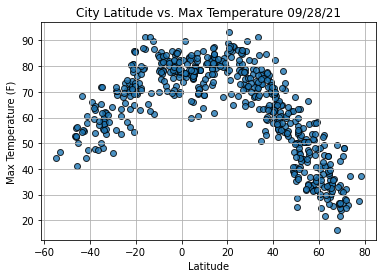

In [94]:
# Import MatplotLib
import matplotlib.pyplot as plt
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/City_lat_temp.png")

# Show plot.
plt.show()

## Build the scatter plot for latitude vs. humidity

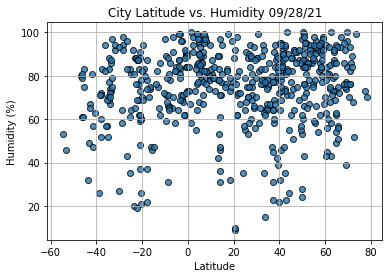

In [95]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

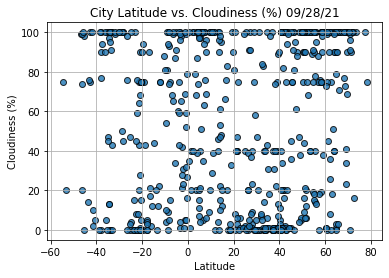

In [96]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_cloudiness.png")
# Show plot.
plt.show()

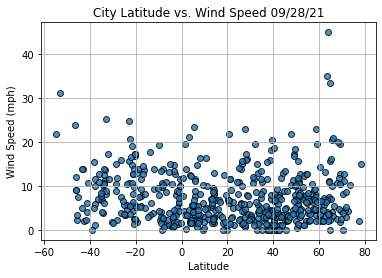

In [97]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_Vs_Windspeed.png")
# Show plot.
plt.show()

# Use Linear Regression to Find the Relationship Between Variables

In [98]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [99]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [100]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [101]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

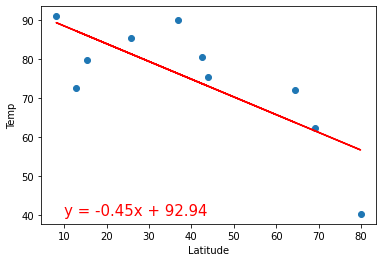

In [102]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

# Find the Correlation Between Latitude and Maximum Temperature

In [104]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [105]:
index13 = city_data_df.loc[13]
index13

City                      Tugulym
Country                        RU
Date          2021-09-29 01:19:41
Lat                       57.0591
Lng                       64.6425
Max Temp                    33.87
Humidity                       92
Cloudiness                     88
Wind Speed                   8.16
Name: 13, dtype: object

In [106]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

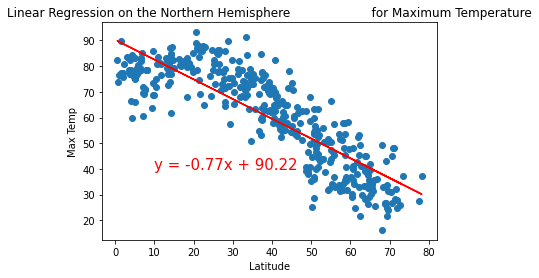

In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                    'Linear Regression on the Northern Hemisphere \
                    for Maximum Temperature', 'Max Temp',(10,40))

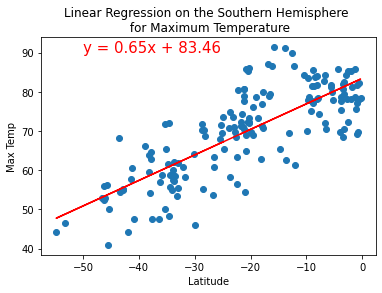

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
          'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

# Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

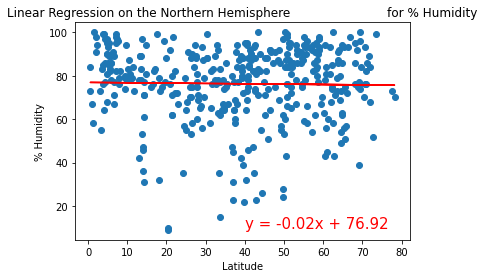

In [109]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

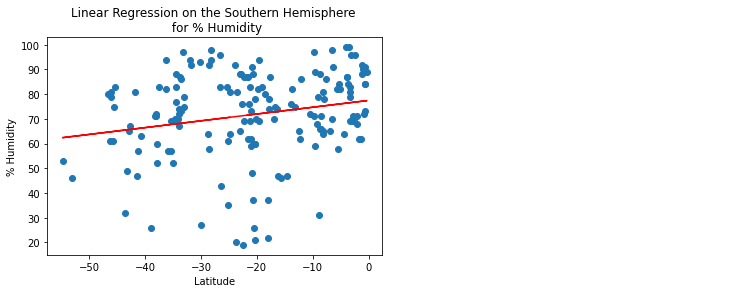

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
          'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(40,10))

# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

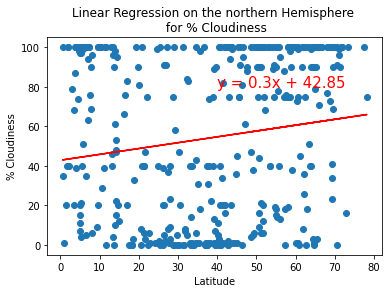

In [111]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
          'Linear Regression on the northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,80))

# Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

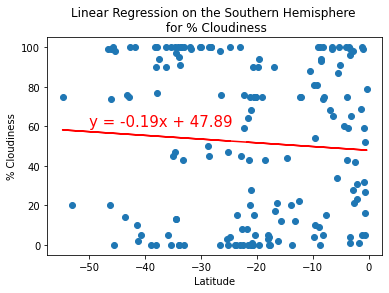

In [112]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
          'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

# Find the Correlation Between Latitude and Wind Speed

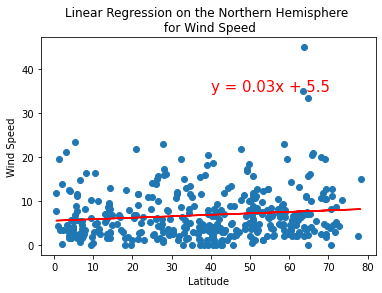

In [113]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

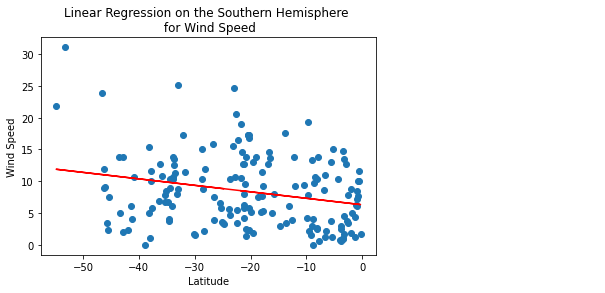

In [114]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(20,20))